In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv.target.shape, oliv.images.shape, oliv.data.shape

((400,), (400, 64, 64), (400, 4096))

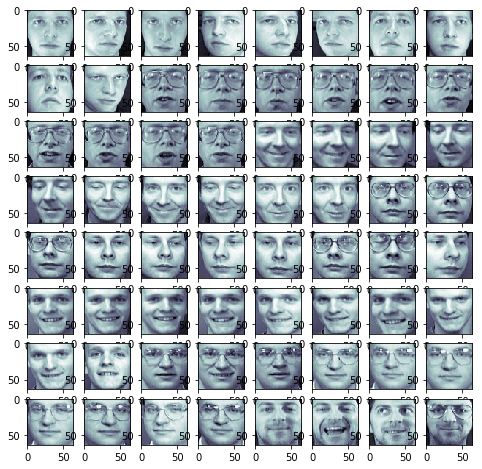

In [5]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)

In [6]:
pca_oliv = PCA()
x = oliv.data
y = oliv.target

In [7]:
pca_oliv.fit(x)
pca_oliv.components_.shape

(400, 4096)

In [8]:
k = 0
total = 0
while total < 0.99:
    total = total + pca_oliv.explained_variance_ratio_[k]
    k+= 1
k

260

In [16]:
pca_oliv = PCA(n_components = k)
x_transformed = pca_oliv.fit_transform(x)
pca_oliv.components_.shape

(260, 4096)

In [10]:
x_transformed.shape

(400, 260)

In [11]:
x_approx = pca_oliv.inverse_transform(x_transformed)
x_approx.shape

(400, 4096)

In [12]:
x_approx = x_approx.reshape((400,64,64))

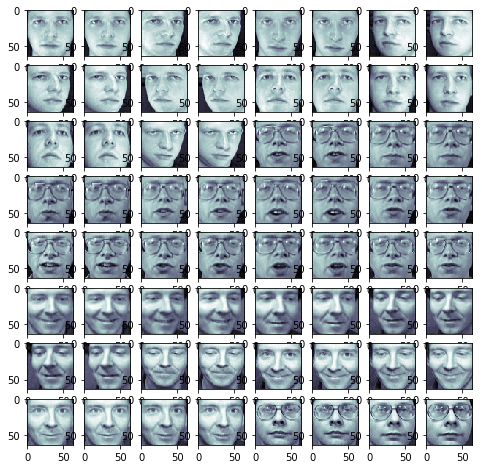

In [13]:
fig = plt.figure(figsize = (8, 8))
for i in range(32):
    ax = fig.add_subplot(8, 8, 2 * i + 1)
    ax.imshow(x_approx[i], cmap=plt.cm.bone)
    ax = fig.add_subplot(8, 8, 2 * i + 2)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)

In [14]:
eigenf = pca_oliv.components_.reshape((260,64,64))

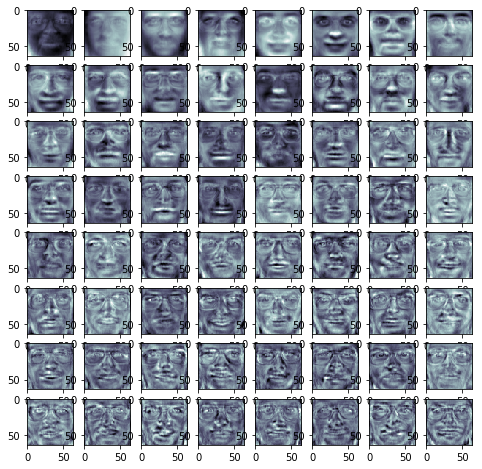

In [15]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigenf[i], cmap=plt.cm.bone)
plt.show()